Forecasts a target time series considering its autocorrelation aswell as its correlation with other monthly time series data frames.

In [85]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

In [86]:
# Set target column you want to forecast
target_column = 'CPIH INDEX 00: ALL ITEMS 2015=100'

In [87]:
# Read in CPIH data frame
df_CPIH = pd.read_csv('CPIH_Indices.csv')
# df_CPIH['Date'] = pd.to_datetime(df_CPIH['Date'])
df_CPIH.set_index('Date', inplace=True)

In [88]:
# Determine columns to consider for the correlation.
# These will be the exogenous regressors used in the model. 
# These variables are not directly modeled by the ARIMA process itself but are believed to influence the variable being forecasted.

df_correlated = df_CPIH.drop(target_column, axis='columns')

In [89]:
# Fit multivariate ARIMA model
model = ARIMA(df_CPIH[target_column], exog=df_correlated, order=(12, 2, 6)) 
model_fit = model.fit()

c:\Users\elian\anaconda3\envs\mac_workshop\lib\site-packages\statsmodels\tsa\base\tsa_model.py:559: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  _index = to_datetime(index)
c:\Users\elian\anaconda3\envs\mac_workshop\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\elian\anaconda3\envs\mac_workshop\lib\site-packages\statsmodels\tsa\base\tsa_model.py:559: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  _index = to_datetime(index)
c:\Users\elian\anaconda3\envs\mac_workshop\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provi

In [90]:
# Forecast the next 3 months (3 steps ahead) to Jan 2024
forecast = model_fit.forecast(steps=3, exog=df_correlated.iloc[-3:])

C:\Users\elian\AppData\Local\Temp\ipykernel_93944\2443919228.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.plot([[df_CPIH.index[-1:][0]][0], future_dates[0:1][0]], [df_CPIH[target_column][-1:][0], forecast[0:1][0]], color='red', linestyle='dashed' )


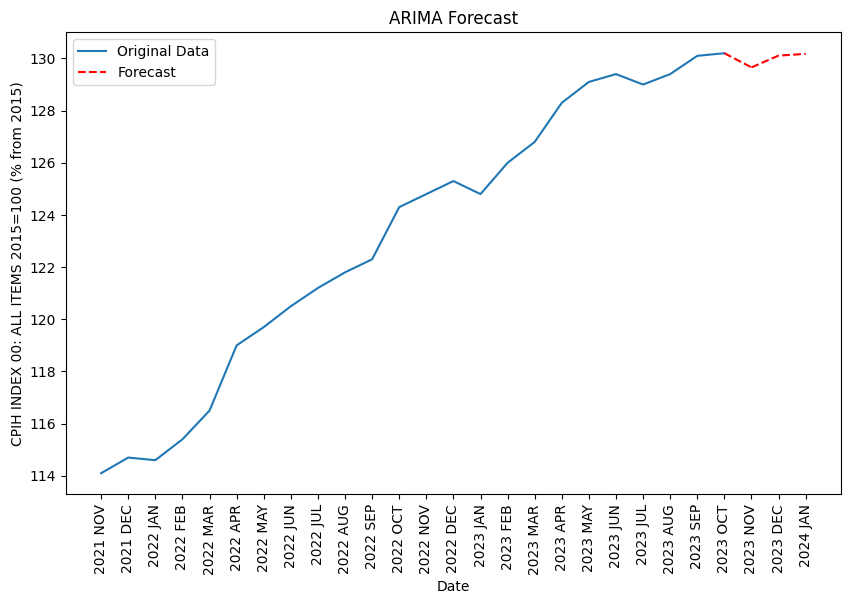

In [96]:
# Create dates for the forecast period
future_dates = ['2023 NOV',
                '2023 DEC',
                '2024 JAN',
                ]

# Plotting the original data and forecast
plt.figure(figsize=(10, 6))
plt.plot(df_CPIH.index[-24:], df_CPIH[target_column][-24:], label='Original Data')
plt.plot([[df_CPIH.index[-1:][0]][0], future_dates[0:1][0]], [df_CPIH[target_column][-1:][0], forecast[0:1][0]], color='red', linestyle='dashed' )
plt.plot(future_dates, forecast, label='Forecast', color='red', linestyle='dashed')

plt.xlabel('Date')
plt.xticks(rotation=90)
plt.ylabel('CPIH INDEX 00: ALL ITEMS 2015=100 (% from 2015)')
plt.title('ARIMA Forecast')
plt.legend()
plt.show()